<a href="https://colab.research.google.com/github/Deepak5j/FraudDetection/blob/master/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fraud Detection**

Our Tasks
- Explore the dataset/Visualize
- Decide which features are important
- Perform Machine Learning
- Test the model on the testing set

In [0]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale #all feature  on same scale, for acuracy
import random

In [269]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
print(df.shape)
df.head()

(89220, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,43099,-1.118881,-0.271093,1.571217,-2.123059,0.261910,-1.461404,0.501903,-0.163618,-1.282815,-0.477760,-0.849077,-0.833265,-0.356216,-0.360846,-1.367467,1.062016,0.042157,-1.644584,-0.686420,0.117782,0.252275,0.419213,-0.317176,0.398020,0.965195,-0.307527,-0.053928,0.046714,41.00,0.0
1,42639,1.428336,-0.436781,0.182394,-0.839069,-0.542371,-0.279604,-0.565077,-0.088253,-0.840290,0.578418,-0.425881,-0.389250,0.824254,-0.270172,0.950570,0.944030,0.299686,-1.724206,0.365656,0.073342,0.137917,0.414365,-0.081002,-0.429180,0.521495,-0.145156,0.025569,0.006357,1.00,0.0
2,41918,-1.835761,-1.139538,2.085587,1.431817,0.129306,-0.399781,-0.247581,0.196617,0.014939,-0.058680,1.099040,0.872082,0.206301,-0.169922,0.106490,0.067507,-0.398476,0.936672,0.678408,-0.051019,0.278190,1.143208,0.928018,0.558407,-0.221826,-0.266859,0.216090,0.155464,103.90,0.0
3,58738,-0.237952,0.592452,1.724581,1.200443,-0.220194,0.211420,0.148873,0.159142,-0.064452,-0.234468,-0.686453,-0.145182,-0.603588,-0.033489,0.630746,-1.347495,1.010452,-0.559954,1.619981,0.102249,0.036833,0.381760,-0.105677,0.130497,-0.421267,0.622113,0.159419,0.139549,11.50,0.0
4,30133,0.994998,-1.106790,0.387466,-0.184460,-1.232018,-0.208375,-0.572321,0.000759,-0.908399,0.841270,0.734237,0.217798,0.051392,0.233576,0.464401,-0.751734,-0.568738,2.069807,-0.774840,-0.131172,-0.056540,-0.093293,-0.226612,0.030446,0.271453,0.646391,-0.041273,0.036430,183.92,0.0


In [270]:
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_frauds))

211
89008


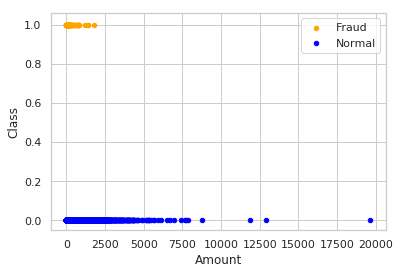

In [271]:
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

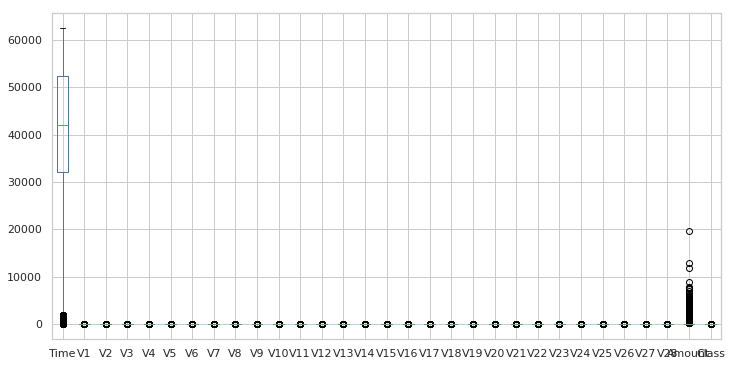

In [272]:
df.plot.box(figsize=(12,6))

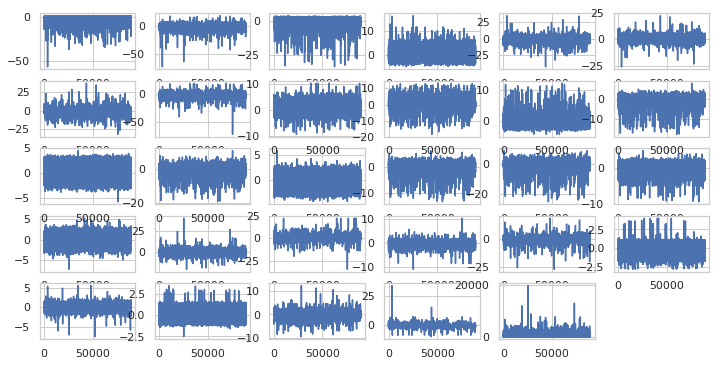

In [273]:
fig = plt.figure(figsize = (12, 6))
plt.subplot(5, 6, 1) ; plt.plot(df.V1) ; plt.subplot(5, 6, 15) ; plt.plot(df.V15)
plt.subplot(5, 6, 2) ; plt.plot(df.V2) ; plt.subplot(5, 6, 16) ; plt.plot(df.V16)
plt.subplot(5, 6, 3) ; plt.plot(df.V3) ; plt.subplot(5, 6, 17) ; plt.plot(df.V17)
plt.subplot(5, 6, 4) ; plt.plot(df.V4) ; plt.subplot(5, 6, 18) ; plt.plot(df.V18)
plt.subplot(5, 6, 5) ; plt.plot(df.V5) ; plt.subplot(5, 6, 19) ; plt.plot(df.V19)
plt.subplot(5, 6, 6) ; plt.plot(df.V6) ; plt.subplot(5, 6, 20) ; plt.plot(df.V20)
plt.subplot(5, 6, 7) ; plt.plot(df.V7) ; plt.subplot(5, 6, 21) ; plt.plot(df.V21)
plt.subplot(5, 6, 8) ; plt.plot(df.V8) ; plt.subplot(5, 6, 22) ; plt.plot(df.V22)
plt.subplot(5, 6, 9) ; plt.plot(df.V9) ; plt.subplot(5, 6, 23) ; plt.plot(df.V23)
plt.subplot(5, 6, 10) ; plt.plot(df.V10) ; plt.subplot(5, 6, 24) ; plt.plot(df.V24)
plt.subplot(5, 6, 11) ; plt.plot(df.V11) ; plt.subplot(5, 6, 25) ; plt.plot(df.V25)
plt.subplot(5, 6, 12) ; plt.plot(df.V12) ; plt.subplot(5, 6, 26) ; plt.plot(df.V26)
plt.subplot(5, 6, 13) ; plt.plot(df.V13) ; plt.subplot(5, 6, 27) ; plt.plot(df.V27)
plt.subplot(5, 6, 14) ; plt.plot(df.V14) ; plt.subplot(5, 6, 28) ; plt.plot(df.V28)
plt.subplot(5, 6, 29) ; plt.plot(df.Amount)
plt.show()

In [274]:
print(fraud.shape)
print(non_frauds.shape)

(211, 31)
(89008, 31)


In [0]:
#np.where(np.isnan(df))
df = pd.DataFrame(df).fillna(0)

In [0]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, :-1]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

In [277]:
#Logistic Regression Model [4] 0.9989
from sklearn import  linear_model
logistic = linear_model.LogisticRegression(C=1e5)#100,000 regulate overfitting
logistic.fit(X_train, y_train)
print('Score:', logistic.score(X_test, y_test))
y_predicted = np.array(logistic.predict(X_test))
print(y_predicted)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.9986870336567714
[0. 0. 0. ... 0. 0. 0.]


In [278]:
#Linear Discriminant Analysis [2] 0.999408
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
print('Score:', clf.score(X_test, y_test))

y_predicted = np.array(clf.predict(X_test))
print(y_predicted)

Score: 0.9990072693502418
[0. 0. 0. ... 0. 0. 0.]


In [279]:
#K Neighbors Classifier [5] 0.9980
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train) 
KNeighborsClassifier(algorithm='auto', leaf_size=30)
print('Score:', clf.score(X_test, y_test))

y_predicted = np.array(clf.predict(X_test))
print(y_predicted)

Score: 0.9974701380215839
[0. 0. 0. ... 0. 0. 0.]


In [280]:
#Decision Tree Classifier [3] 0.9991
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
print('Score:', clf.score(X_test, y_test))

y_predicted = np.array(clf.predict(X_test))
print(y_predicted)

Score: 0.999167387196977
[0. 0. 0. ... 0. 0. 0.]


In [281]:
#Random Forest Classifier [1] 0.999458
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print('Score: ', clf.score(X_test, y_test))

y_predicted = np.array(clf.predict(X_test))
print(y_predicted)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score:  0.9994555993211003
[0. 0. 0. ... 0. 0. 0.]


In [0]:
#saving prediction to CSV file
pd.DataFrame(y_predicted, columns=['isFraud']).to_csv('predictions1.csv')

In [0]:
out = pd.read_csv('predictions1.csv', low_memory=False)
out = out.rename(columns = {'Unnamed: 0':'TransactionID'})
out.head()
out.to_csv("sub1.csv", index=False)